# Loading the dataset



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [105]:
#loading the dataset
dataset = pd.read_csv("/content/audit_risk.csv")

# Exploratory Data Analysis

In [106]:
dataset.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [107]:
dataset.shape

(776, 27)

In [108]:
dataset.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [109]:
dataset.isnull().sum()
#there is only one value that is seen in the columns called Money_value as the null value. 
#many imputation techniques can be used in order to impute this missing values, such as the methods called the simple imputation where mean, median and other methods can be used.
# Apart from this and KNN imputation 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In our dataset we are dealing with the problem of classification , where based on the attributes provided to us which are 25, we have to prdict our response variable "Risk". It contains two classes 0 and 1 , with total number of columns to 776.

In [111]:
dataset.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

However, there is no fixed threshold for the class balance that defines an imbalanced dataset. Some researchers have suggested that a class balance of less than 0.1 or greater than 0.9 may indicate an imbalanced dataset, but this can vary depending on the specific context and the goals of the machine learning model.

In [112]:
#the percentage of predictor variable is not that much imbalanced they are very close to being present in the similar form.
#though we will be testing out the model with the present class and class imblance form.
print(f"percentage of 0 present are  {round(((471/776)*100),2)}%")
print(f"percentage of 1 present are  {round(((305/776)*100),2)}%")


percentage of 0 present are  60.7%
percentage of 1 present are  39.3%


In [113]:
dataset.describe()

#it provides us the picture in which way the data is distributed amoung the dataset with certain values having very vast 
#scale this is on the longer side.

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


There is only one missing value present in the dataset, so we will be using the mean method in order to impute it in the dataset. Though there are different techniques that are present in order to impute the missing values but, out of 776 we have to fill out only 1 values.

In [114]:
dataset['Money_Value'] = dataset['Money_Value'].fillna(dataset['Money_Value'].mean())
#we have imputed the values using the mean values of the columns where there were missing values present.

Exploring the relationship between the categorical values present in the dataset.

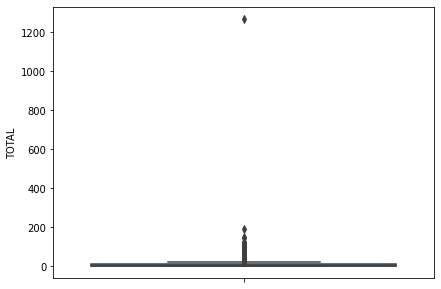

In [115]:
#defining the figure size beforehand to inspect in the visual form
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y= dataset['TOTAL'])

In [116]:
#creating the boxplot in the figure to predict the variable and see their distribution of the dataset
dataset.History.value_counts()

0    726
1     35
2      9
3      2
4      2
9      1
5      1
Name: History, dtype: int64

In [117]:
pd.crosstab(dataset['History'],dataset['Risk'])

Risk,0,1
History,,
0,470,256
1,1,34
2,0,9
3,0,2
4,0,2
5,0,1
9,0,1


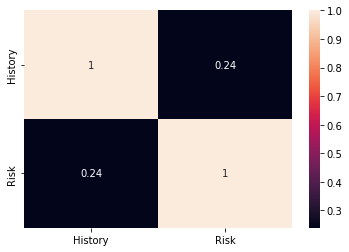

In [118]:
sns.heatmap(dataset[['History','Risk']].corr(),annot=True)
#we cannot be able to find the correlation between these two variable

In [119]:
pd.crosstab(dataset['District_Loss'],dataset['Risk'])

Risk,0,1
District_Loss,,
2,446,207
4,25,25
6,0,73


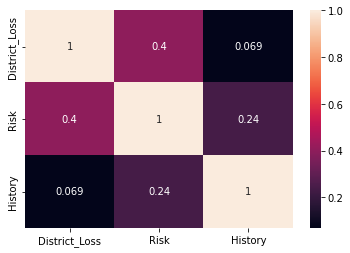

In [120]:
sns.heatmap(dataset[['District_Loss','Risk','History']].corr(),annot=True)
#There is not any major correlation that is present in the categorical columns in the dataset.

Removing the string object from the dataframe from the object that is created using the object , in order to build the model from the dataset ,we need to remove this particular columns containing this words from the dataset, then only we can build model around it.

In [121]:
dataset['LOCATION_ID'].value_counts()
#it means that there are three characters that are present in the location_id 
#there are total of three characters present in the location_id , we need to remove these string from the object that we have created.


8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64

In [122]:
# filtering the rows where Credit-Rating is Fair
df1 = pd.DataFrame(dataset[dataset['LOCATION_ID'].str.contains('SAFIDON')])
df1

#we need to remove this particular columns from the dataframe so that we can build the model otherwise we will get the error.

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,0.4,0,0.2,0.0,2.0,1.59,0.4,0.5,0.318,0


In [123]:
df2 = pd.DataFrame(dataset[dataset['LOCATION_ID'].str.contains('LOHARU')])
df2

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
351,1.99,LOHARU,0.3,0.2,0.06,0.0,0.2,0.0,0.3,5.0,...,0.4,0,0.2,0.0,2.0,1.46,0.4,0.5,0.292,0


In [124]:
df3 = pd.DataFrame(dataset[dataset['LOCATION_ID'].str.contains('NUH')])
df3

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
355,1.99,NUH,0.55,0.2,0.11,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0


In [125]:
dataset_1 = dataset.copy()

In [126]:
dataset_1.shape

(776, 27)

Dropping the values with the string characters in it.

In [127]:
dataset_1.drop(dataset_1.index[[367,351,355]], inplace=True)

In [128]:
dataset_1.shape

(773, 27)

Normalizing the dataset - 
It is generally a good idea to explore the distribution of the variables in the dataset and choose the appropriate preprocessing technique based on that. It is also important to remember that some models, such as tree-based models, are not sensitive to the scale of the input variables and do not require preprocessing. In these cases, standardization and normalization may not be necessary

# Starting with the modelling of the dataset

In [129]:
X = dataset_1.drop('Risk',axis=1)
y = dataset_1['Risk']

we will be splitting the dataset into 3 parts where the training set of the dataset will be containing the 60% of the data of whole dataset and rest all will be divided into the training and validation set with each containing close to 20% and 20% data in them respectively.The test set will not be used anywhere in the modelling purpose, it will be used to get our final prediction of the model.

In [130]:
#splitting the dataset in three variable set
from sklearn.model_selection import train_test_split

# Split the data into a train set (60%), a test set (20%), and a validation set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [131]:
dataset_shape = [X_train,y_train,X_test, y_test, X_val, y_val]

for i in dataset_shape:
  print(i.shape)

(618, 26)
(618,)
(77, 26)
(77,)
(78, 26)
(78,)


#Random Forest

In [132]:
#loading the model into the randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import accuracy_score ,precision_score , recall_score 

Creating the function for the random forrest model

In [133]:
def random_hyper(n_est,depth):
    rf = RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)#taking the random parameters of the model
    rf_model = rf.fit(X_train,y_train)#fitting the model to the dataset
    y_pred = rf_model.predict(X_test)#predicting the performance on the test set of the dataset
    accuracy = accuracy_score(y_test,y_pred )#calculating the accuracy score of the model
    precision = precision_score(y_test,y_pred,average='weighted')#for multiclass classification problem it is important to change this parameter
    recall = recall_score(y_test,y_pred,average='weighted')#calculating the recall score of the model 
    print('Est: {}, Depth: {}, -----------Precision:{} / recall:{} / Accuracy:{}'.format(n_est,depth,
                                                                                        precision,recall,accuracy))
    #printing the all the parameters according to the hyperparameters that are shared with the model

In [134]:
#checking out the accuracy at all the levels of the dataset.
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        random_hyper(n_est,depth)

Est: 10, Depth: 10, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 10, Depth: 20, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 10, Depth: 30, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 10, Depth: None, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 50, Depth: 10, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 50, Depth: 20, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 50, Depth: 30, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 50, Depth: None, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 100, Depth: 10, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 100, Depth: 20, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 100, Depth: 30, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0
Est: 100, Depth: None, -----------Precision:1.0 / recall:1.0 / Accuracy:1.0


Checking the accuracy of the model with the scaled dataset, where the distribution of the dataset is transformed in way, that the average mean distribution of the dataset gets closer to 0 and the standard deviation to 1 , in a way it becomes more normally distributed.

# Stratified K-fold Cross validation

In [135]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [136]:
rf = RandomForestClassifier() #creating the object of the model

In [137]:
X_array = np.array(X) #converting the dataframe into an array form
y_array = np.array(y)

In [138]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_array, y_array):
    x_train_fold, x_test_fold = X_array[train_index], X_array[test_index]
    y_train_fold, y_test_fold = y_array[train_index], y_array[test_index]
    rf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rf.score(x_test_fold, y_test_fold))

In [139]:
rf.feature_importances_

array([7.20061150e-04, 7.93279263e-04, 8.58324111e-03, 1.09557938e-02,
       1.21680632e-02, 2.23549846e-02, 7.88572880e-03, 3.43401017e-02,
       1.18323137e-01, 3.49699292e-04, 3.25303056e-04, 3.51072386e-04,
       2.21181277e-02, 4.04737855e-02, 4.30802857e-02, 1.92174959e-02,
       1.07733062e-04, 3.39324507e-02, 0.00000000e+00, 5.98167783e-05,
       4.40619395e-04, 1.10494492e-01, 1.51422476e-01, 3.26427561e-02,
       0.00000000e+00, 3.28859496e-01])

In [140]:
 columns_data = dataset_1.columns[:-1]

#plt.barh(dataset_1.feature_names,rf.feature_importances_)

<BarContainer object of 26 artists>

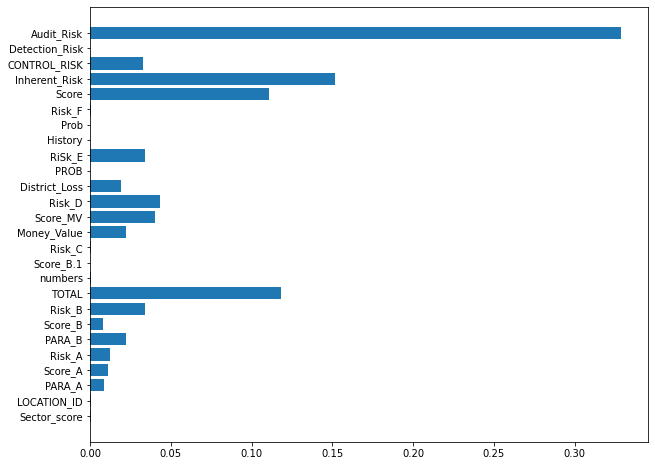

In [141]:
fig = plt.figure(figsize=(10, 8))
plt.barh(columns_data,rf.feature_importances_)

#it can be seen that there are total of 6 features which has zero participation when it comes of contribution to the model,and the 
#top most contributor to the model is the audit risk.

In [142]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 0.987012987012987, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 98.7012987012987 %

Overall Accuracy: 99.87012987012986 %

Standard Deviation is: 0.004106854104114779


#Grid Search CV

In [143]:
#importing the libraray from the sklearn 
from sklearn.model_selection import GridSearchCV

# create a random forest model
model = RandomForestClassifier()

# define the parameter grid for the model
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object with 10-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=10)

# fit the grid search object to the data
grid_search.fit(X, y)

# get the best model
best_model = grid_search.best_estimator_

In [144]:
#finding out the best hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_) #finding out the best score from all the hyperparameters

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
1.0


In [145]:
new_random = RandomForestClassifier(max_depth=None,min_samples_leaf=1 , min_samples_split=2,n_estimators=50)

In [146]:
new_random.fit(X_test,y_test)

RandomForestClassifier(n_estimators=50)

In [147]:
y_pred = new_random.predict(X_test)
#finding out the accuracy of the model 
from sklearn import metrics
#printing out the accuracy score on the dataset
metrics.accuracy_score(y_pred,y_test)

1.0

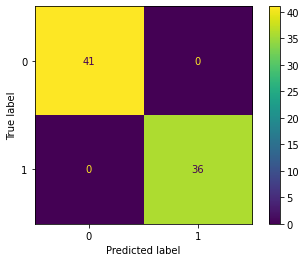

In [148]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix , ConfusionMatrixDisplay
#plotting the confusion metrics of the test dataset
# calculate the confusion matrix
cm = confusion_matrix(y_pred , y_test)
#displaying the confusion matrix of the dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# plot the confusion matrix
disp.plot()
plt.show()

In the above confusion matrix we can see the results of the tuned model that we have obtained using the girdserach cv.

#Logistic Regression

# scaling the dataset

Scaling the dataset in order to find the accuracy of the model when the dataset is normally distributed and how it affects the overall accuracy of the model.

In [149]:
from sklearn.preprocessing import StandardScaler

# Assume that X is a numpy array with the features of your dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [150]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X_standardized)

# Transform the data
data_normalized = scaler.transform(X_standardized)

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#creating the object for the logistic regression model
logistic = LogisticRegression()

#defining the parameter grid
parameter = {
    'penalty': ['l1','l2'],
    'C': np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

#intiating the object of the gridserachcv in the clf
clf = GridSearchCV(logistic,param_grid=parameter,scoring='accuracy',cv=10)

#fitting the model to the dataset and finding out the best parameter of the model
clf.fit(X_train,y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [153]:
print('tuned hyperparameters',clf.best_params_)
print('accuracy',clf.best_score_)

tuned hyperparameters {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy 0.9983870967741936


#Naive Bayes algorithm

In [154]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# create the MultinomialNB model
model = MultinomialNB()

# define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

# create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=10)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")


Best parameters: {'alpha': 0.1, 'fit_prior': True}
Best score: 0.89


Your last task is to summarise the whole thing in the form of getting all the accuracy and the scores that will be summed up in the table.